In [1]:
import seaborn as sns
sns.set(style="white")

from sklearn import decomposition
from sklearn import metrics
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix, classification_report
from sklearn.preprocessing import MaxAbsScaler
import logitboost
from sklearn.ensemble import GradientBoostingClassifier

# Using normalised data

In [189]:
df = pd.read_csv('dt_for_ML.csv')

In [190]:
df = df.drop('Unnamed: 0', axis=1)

In [191]:
df = df.drop(df[df['Объективный ответ'] == 'CR'].index)

In [192]:
df.head()

,пол,Возраст,Объективный ответ,Прогресс,Клиническое состояние при прогрессировании,Группа_ХТ-2_ИТ-1,ИТ_остановлена,Сочетание_с_ХТ,Жив_умер,число введений,...,Tannerellaceae,Terasakiellaceae,Unknown_Family,vadinBE97,Veillonellaceae,Victivallaceae,Weeksellaceae,Xanthobacteraceae,Xanthomonadaceae,Unnamed: 136
0,М,40.608219,PR,нет,без динамики,1.0,да,нет,жив,9.0,...,122.192930,0.0,0.0,11.473609,84.505099,3.328503,0.0,0.0,0.0,118.968117
1,Ж,69.780822,PD,есть,ухудшение,1.0,да,нет,жив,4.0,...,5.572475,0.0,0.0,0.000000,10.569889,0.000000,0.0,0.0,0.0,23.121680
2,Ж,65.268493,PR,нет,улучшение,1.0,да,нет,жив,9.0,...,42.602812,0.0,0.0,0.000000,27.526541,0.000000,0.0,0.0,0.0,14.261784
3,М,73.621918,PR,есть,NaN,1.0,да,нет,жив,12.0,...,30.660812,0.0,0.0,0.000000,9.189186,0.000000,0.0,0.0,0.0,70.733318
4,М,57.298630,PD,есть,ухудшение,1.0,да,да,жив,2.0,...,128.952278,0.0,0.0,0.000000,18.551373,0.000000,0.0,0.0,0.0,66.708735


### Use Progress as a dependent variable

In [193]:
df['Прогресс'].value_counts(dropna = False) 

нет     41
есть    22
Name: Прогресс, dtype: int64

In [194]:
df = df.drop(df[df['Прогресс'] == 'SD'].index)

### MaxAbsScaler + KNeighborsClassifier + SequentialFeatureSelector

In [195]:
X = df.iloc[:, 39:]
y = df['Прогресс']
y

0      нет
1     есть
2      нет
3     есть
4     есть
      ... 
59     нет
60     нет
62     нет
63     нет
64     нет
Name: Прогресс, Length: 63, dtype: object

In [196]:
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

In [197]:
X_train.shape, X_test.shape

((44, 89), (19, 89))

In [198]:
max_abs_scaler = MaxAbsScaler()

In [199]:
max_abs_scaler.fit(X_train)

MaxAbsScaler()

In [200]:
X_train = max_abs_scaler.transform(X_train)
X_test = max_abs_scaler.transform(X_test)

In [201]:
classifier = KNeighborsClassifier(n_neighbors=3)

In [202]:
sfs = SequentialFeatureSelector(classifier, n_features_to_select=30, cv = 10)

In [203]:
feat_fitted = sfs.fit(X_train, y_train)

### LASSO LR

In [204]:
log_regr_clf = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, max_iter=300)


In [205]:
log_regr_clf.fit(X_train, y_train)

LogisticRegression(max_iter=300, penalty='l1', random_state=42,
                   solver='liblinear')

In [206]:
y_pred_test = log_regr_clf.predict(X_test)

In [207]:
print(sklearn.metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

        есть       0.40      0.40      0.40         5
         нет       0.79      0.79      0.79        14

    accuracy                           0.68        19
   macro avg       0.59      0.59      0.59        19
weighted avg       0.68      0.68      0.68        19



In [208]:
feature_importance=pd.DataFrame({'feature':list(X.columns),'feature_importance':[abs(i) for i in log_regr_clf.coef_[0]]})
feature_importance.sort_values('feature_importance',ascending=False)

,feature,feature_importance
59,Prevotellaceae,1.503145
8,Bacteroidaceae,0.716905
15,Carnobacteriaceae,0.473757
54,Pasteurellaceae,0.260099
51,Muribaculaceae,0.243365
...,...,...
29,Enterobacteriaceae,0.000000
28,Eggerthellaceae,0.000000
27,Dysgonomonadaceae,0.000000
26,Desulfovibrionaceae,0.000000


In [209]:
lasso_plt = feature_importance.sort_values('feature_importance',ascending=False)

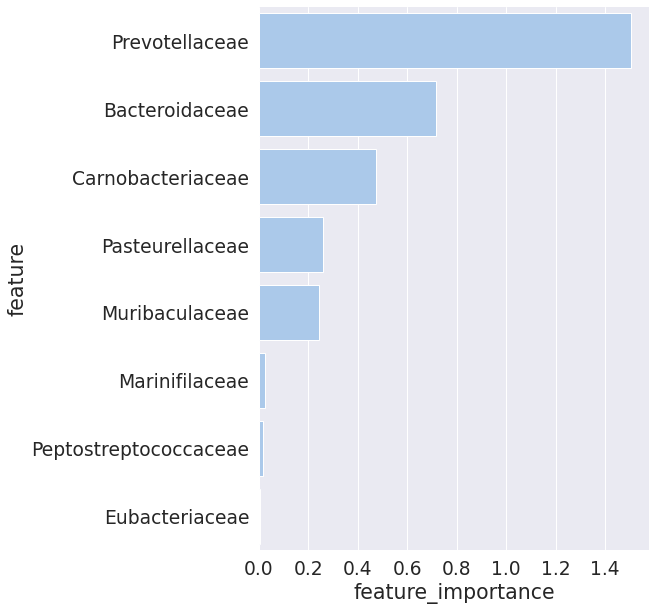

In [306]:
sns.set_context('paper')



sns.set(font_scale = 1.7)
sns.set_color_codes('pastel')
sns.barplot(x = 'feature_importance' , y ='feature' , data = lasso_plt[:8],
            label = 'Total', color = 'b', edgecolor = 'w')

sns.despine(left = True, bottom = True)
sns.set(rc={'figure.figsize':(7,10)})
plt.show()

### Logitboost LR

In [213]:
lg = logitboost.LogitBoost()
lg.fit(X_train, y_train)

LogitBoost()

In [214]:
y_pred_test = lg.predict(X_test)

In [215]:
print(sklearn.metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

        есть       0.33      0.20      0.25         5
         нет       0.75      0.86      0.80        14

    accuracy                           0.68        19
   macro avg       0.54      0.53      0.52        19
weighted avg       0.64      0.68      0.66        19



In [216]:
feature_importances=pd.DataFrame({'features':X.columns,'feature_importance':lg.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
67,Ruminococcaceae,0.10
45,Marinifilaceae,0.10
42,Lachnospiraceae,0.10
8,Bacteroidaceae,0.08
31,Erysipelotrichaceae,0.08
...,...,...
38,Fusobacteriaceae,0.00
37,Fimbriimonadaceae,0.00
35,Family_XI,0.00
34,Family_X,0.00


In [217]:
for_plt = feature_importances.sort_values('feature_importance',ascending=False)

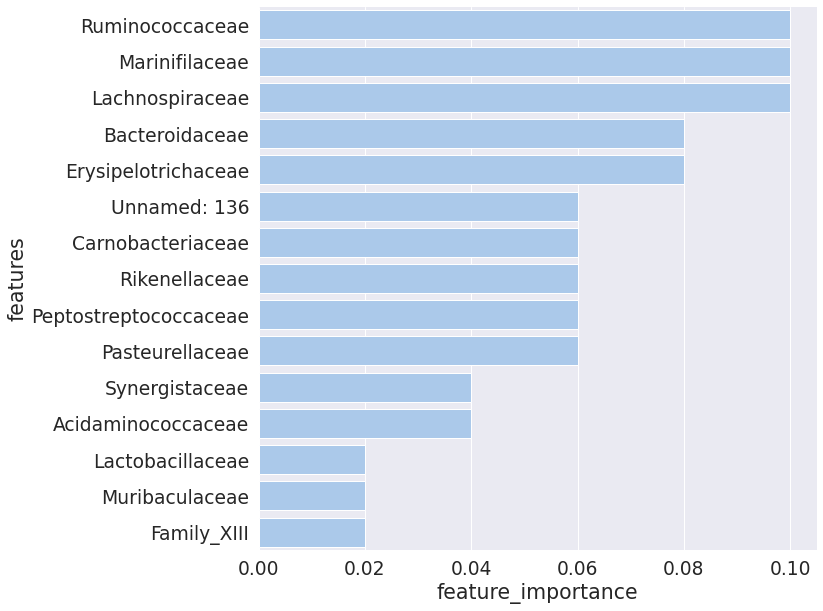

In [304]:
sns.set_context('paper')


sns.set(font_scale = 1.7)
sns.set_color_codes('pastel')
sns.barplot(x = 'feature_importance' , y ='features' , data = for_plt[:15],
            label = 'Total', color = 'b', edgecolor = 'w')

sns.despine(left = True, bottom = True)
sns.set(rc={'figure.figsize':(7,10)})
plt.show()

### GradientBoostingClassifier LR

In [221]:
clf = GradientBoostingClassifier(n_estimators=100).fit(X_train, y_train)

In [222]:
y_pred_test = clf.predict(X_test)

In [223]:
print(sklearn.metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

        есть       0.38      0.60      0.46         5
         нет       0.82      0.64      0.72        14

    accuracy                           0.63        19
   macro avg       0.60      0.62      0.59        19
weighted avg       0.70      0.63      0.65        19



In [224]:
feature_importances=pd.DataFrame({'features':X.columns,'feature_importance':clf.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
8,Bacteroidaceae,0.169474
59,Prevotellaceae,0.168249
67,Ruminococcaceae,0.154897
45,Marinifilaceae,0.093793
30,Enterococcaceae,0.069011
...,...,...
60,Prolixibacteraceae,0.000000
61,Propionibacteriaceae,0.000000
63,Puniceicoccaceae,0.000000
64,Rhodobacteraceae,0.000000


In [225]:
gb_plt = feature_importances.sort_values('feature_importance',ascending=False)

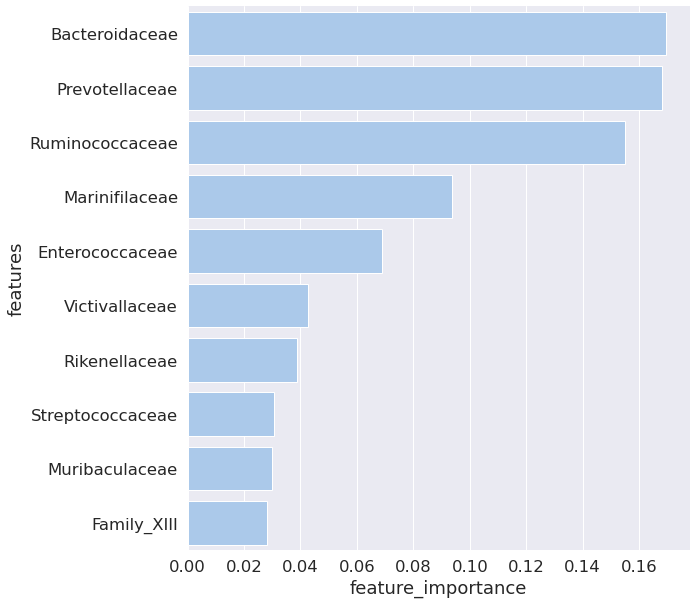

In [310]:
sns.set_context('paper')

sns.set(font_scale = 1.5)

sns.set_color_codes('pastel')
sns.barplot(x = 'feature_importance' , y = 'features' , data = gb_plt[:10],
            label = 'Total', color = 'b', edgecolor = 'w')

sns.despine(left = True, bottom = True)
sns.set(rc={'figure.figsize':(10,10)})

plt.show()

### Random forest

In [228]:
rf_est = RandomForestClassifier(random_state = 0)
parametrs = {'criterion': ['entropy'],
             'n_estimators': range(10,100,25),
             'max_depth': range(1,20,4),
             'min_samples_leaf':range(1,21,4)}

grid = GridSearchCV(rf_est, parametrs, cv=3,n_jobs=-1)

In [229]:
grid.fit(X_train, y_train)
grid.best_params_ 

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'n_estimators': 60}

In [234]:
grid_best = grid.best_estimator_
predictions_full = grid_best.predict(X_test)
print(classification_report(y_test, predictions_full))

              precision    recall  f1-score   support

        есть       0.67      0.40      0.50         5
         нет       0.81      0.93      0.87        14

    accuracy                           0.79        19
   macro avg       0.74      0.66      0.68        19
weighted avg       0.77      0.79      0.77        19



In [235]:
feature_importanc = grid_best.feature_importances_

In [236]:
feature_importances=pd.DataFrame({'features':X.columns,'feature_importance':grid_best.feature_importances_})
rf_plt = feature_importances.sort_values('feature_importance',ascending=False)

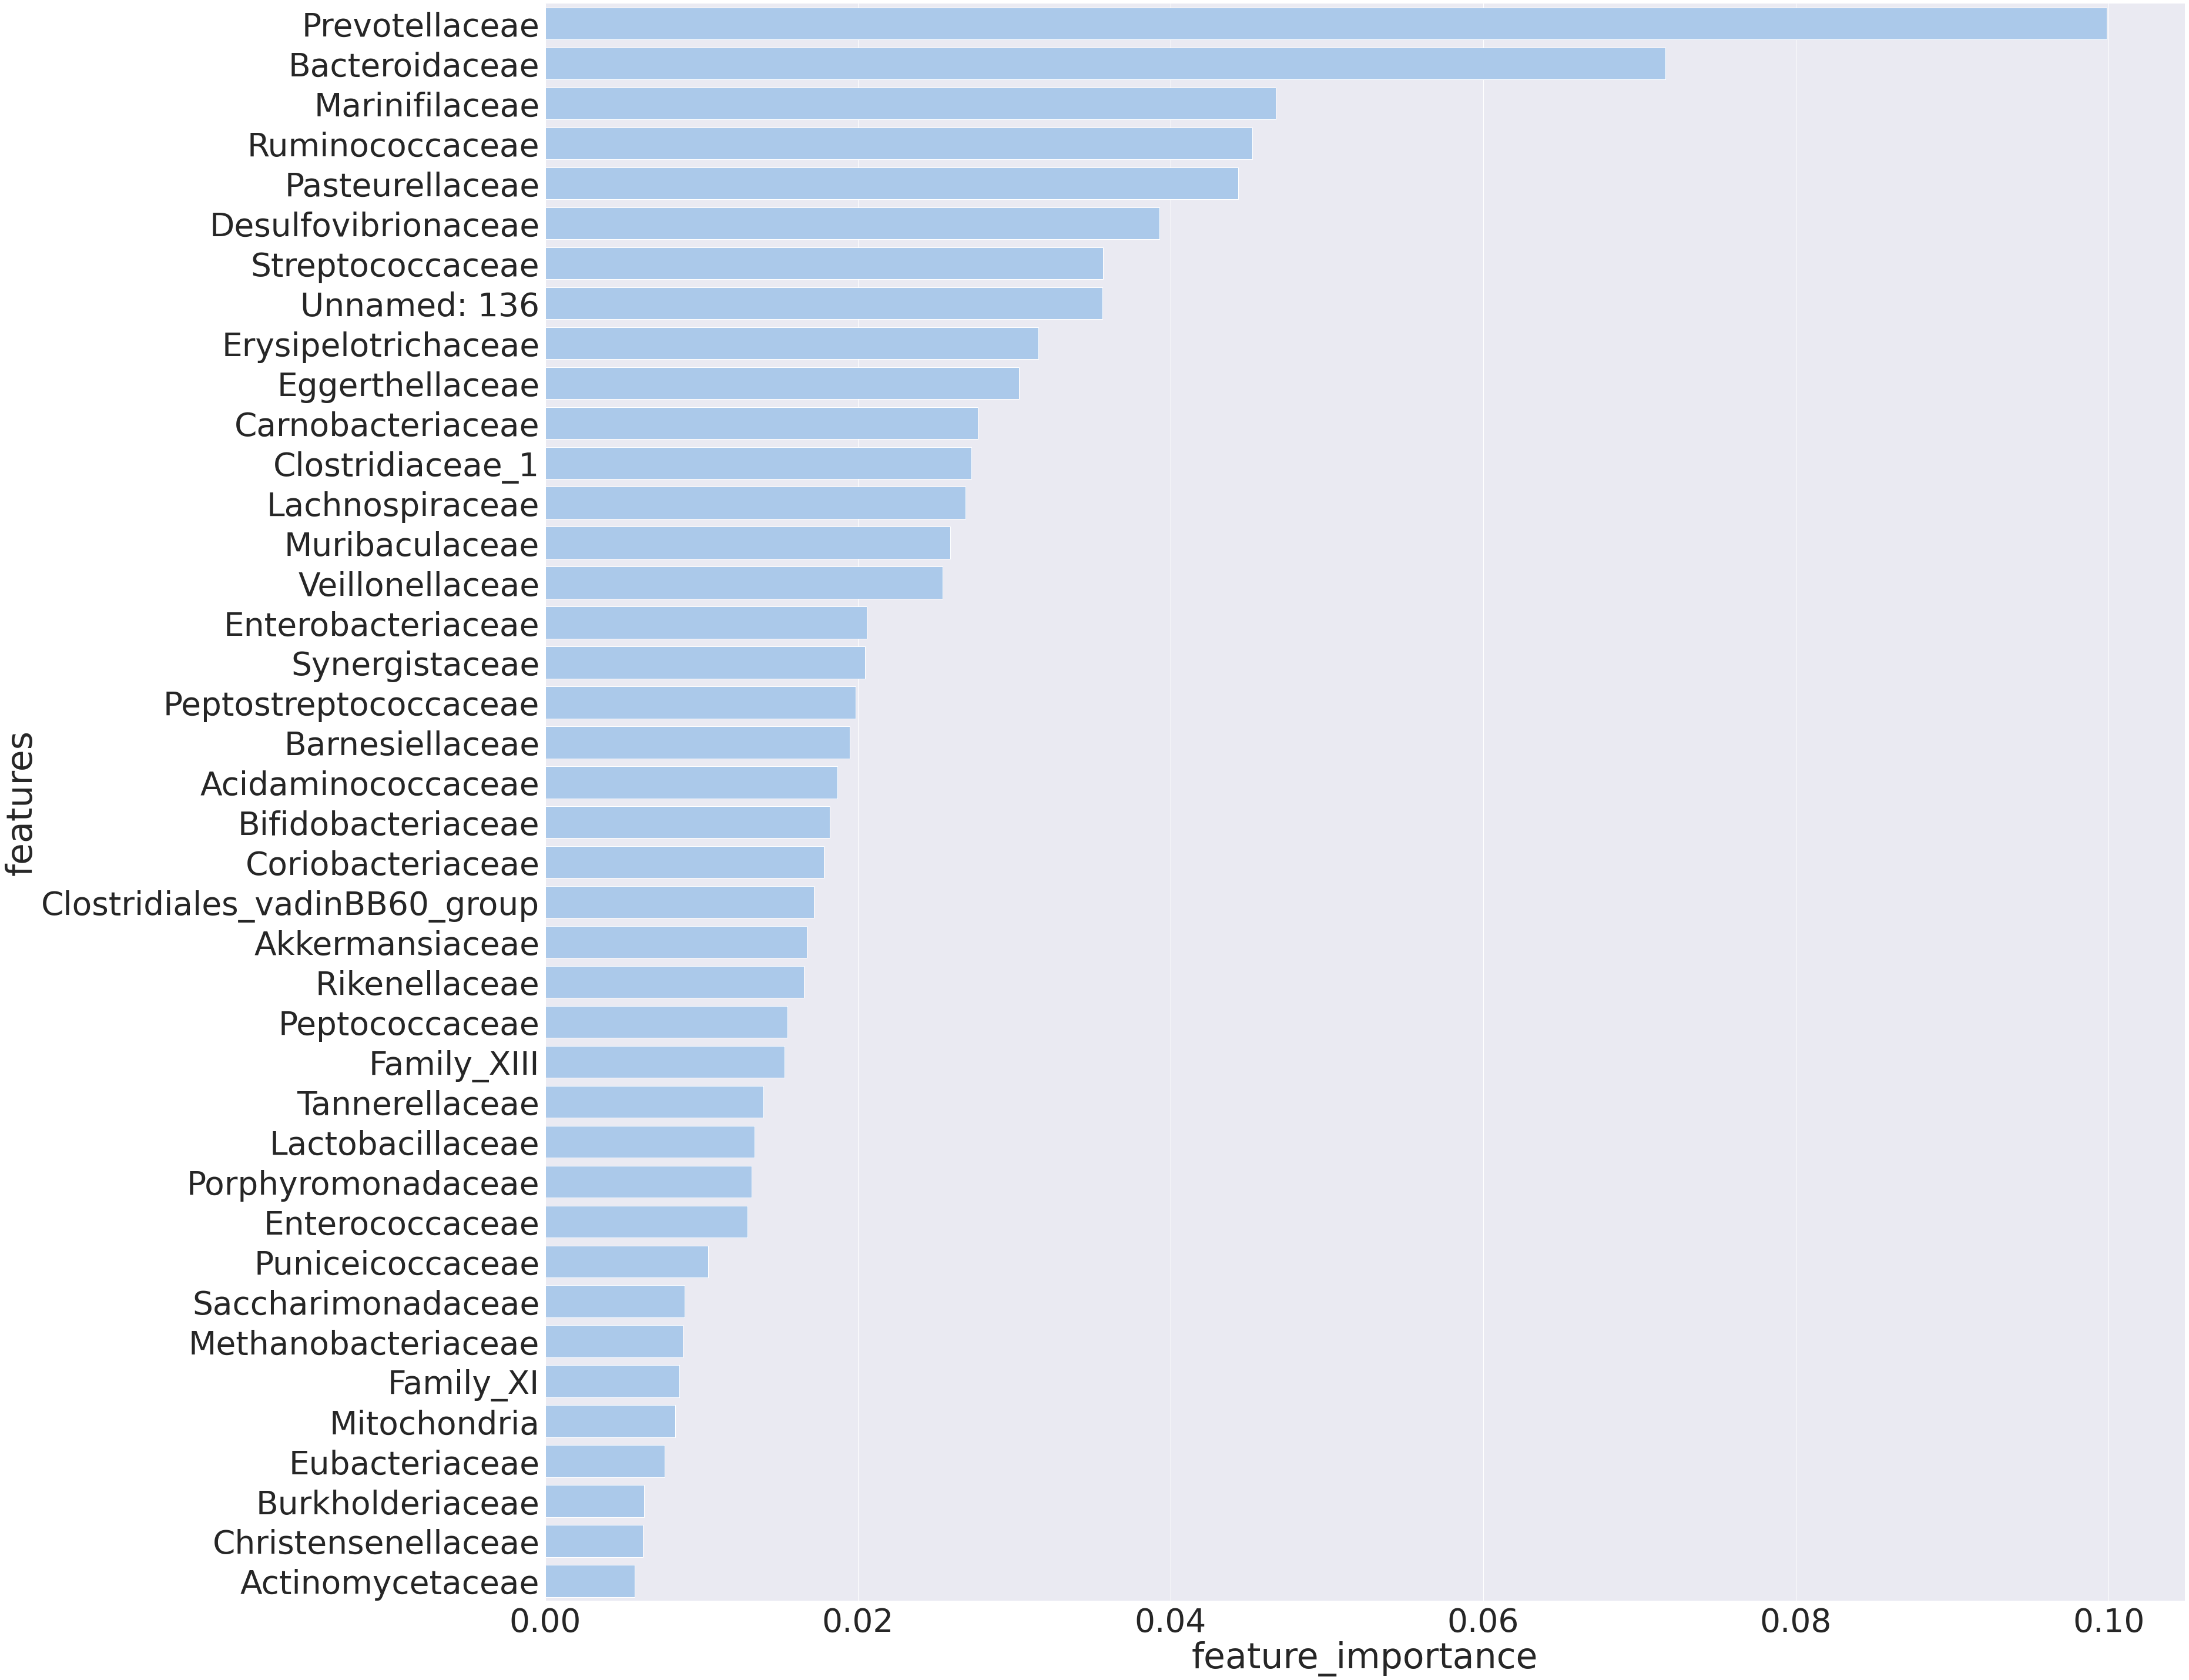

In [238]:
sns.set_context('paper')

sns.set(font_scale = 5)

sns.set_color_codes('pastel')
sns.barplot(x = 'feature_importance' , y = 'features' , data = rf_plt[:40],
            label = 'Total', color = 'b', edgecolor = 'w')

sns.despine(left = True, bottom = True)
sns.set(rc={'figure.figsize':(50,50)})

plt.show()

## Use Objective Responce as a dependent variable

In [2]:
df = pd.read_csv('dt_for_ML.csv')

In [3]:
df = df.drop('Unnamed: 0', axis=1)

In [4]:
df['Объективный ответ'].value_counts(dropna = False) 

PR    26
SD    23
PD    14
CR     2
Name: Объективный ответ, dtype: int64

In [5]:
df['Объективный ответ'] = df['Объективный ответ'].astype('object')

In [6]:
df['Объективный ответ'] = df['Объективный ответ'].replace('CR', 'R').replace('PR', 'R')

In [7]:
df['Объективный ответ'] = df['Объективный ответ'].replace('SD', 'NR').replace('PD', 'NR')

In [8]:
df.columns.get_loc('Acidaminococcaceae')

39

In [9]:
X = df.iloc[:, 39:]
y = df['Объективный ответ']


In [10]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=13)

In [11]:
max_abs_scaler = MaxAbsScaler()
max_abs_scaler.fit(X_train)

MaxAbsScaler()

In [12]:
X_train = max_abs_scaler.transform(X_train)
X_test = max_abs_scaler.transform(X_test)

In [13]:
classifier = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(classifier, n_features_to_select=30, cv = 10)

In [14]:
sfs.fit(X_train, y_train)

SequentialFeatureSelector(cv=10, estimator=KNeighborsClassifier(n_neighbors=3),
                          n_features_to_select=30)

### GradientBoostingClassifier LR

In [283]:
clf_or = GradientBoostingClassifier(n_estimators=100)

In [284]:
clf_or.fit(X_train, y_train)

GradientBoostingClassifier()

In [285]:
y_pred_test = clf_or.predict(X_test)

In [286]:
print(sklearn.metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          NR       0.67      0.73      0.70        11
           R       0.62      0.56      0.59         9

    accuracy                           0.65        20
   macro avg       0.65      0.64      0.64        20
weighted avg       0.65      0.65      0.65        20



In [287]:
feature_importances=pd.DataFrame({'features':X.columns,'feature_importance':clf_or.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
30,Enterococcaceae,0.179752
13,Burkholderiaceae,0.144550
21,Clostridiales_vadinBB60_group,0.095002
8,Bacteroidaceae,0.088835
88,Unnamed: 136,0.052135
...,...,...
53,Oligosphaeraceae,0.000000
52,Neisseriaceae,0.000000
50,Moraxellaceae,0.000000
49,Mitochondria,0.000000


In [288]:
or_imp = feature_importances.sort_values('feature_importance',ascending=False)

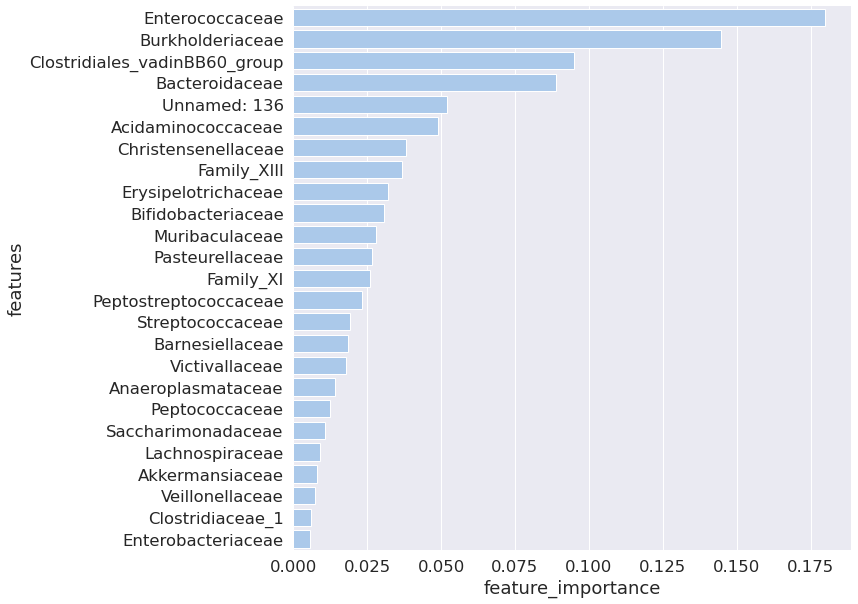

In [311]:
sns.set_context('paper')

sns.set(font_scale = 1.5)

sns.set_color_codes('pastel')
sns.barplot(x = 'feature_importance' , y = 'features' , data = or_imp[:25],
            label = 'Total', color = 'b', edgecolor = 'w')

sns.despine(left = True, bottom = True)
sns.set(rc={'figure.figsize':(10,10)})

plt.show()

### Logitboost 

In [290]:
lg_or = logitboost.LogitBoost()
lg_or.fit(X_train, y_train)

LogitBoost()

In [292]:
y_pred_test = lg_or.predict(X_test)

In [293]:
print(sklearn.metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          NR       0.75      0.82      0.78        11
           R       0.75      0.67      0.71         9

    accuracy                           0.75        20
   macro avg       0.75      0.74      0.74        20
weighted avg       0.75      0.75      0.75        20



In [294]:
feature_importances=pd.DataFrame({'features':X.columns,'feature_importance':lg_or.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
13,Burkholderiaceae,0.08
36,Family_XIII,0.08
8,Bacteroidaceae,0.08
30,Enterococcaceae,0.08
18,Christensenellaceae,0.08
...,...,...
39,Halomonadaceae,0.00
6,Atopobiaceae,0.00
37,Fimbriimonadaceae,0.00
7,Bacillaceae,0.00


In [295]:
or_imp_lb = feature_importances.sort_values('feature_importance',ascending=False)

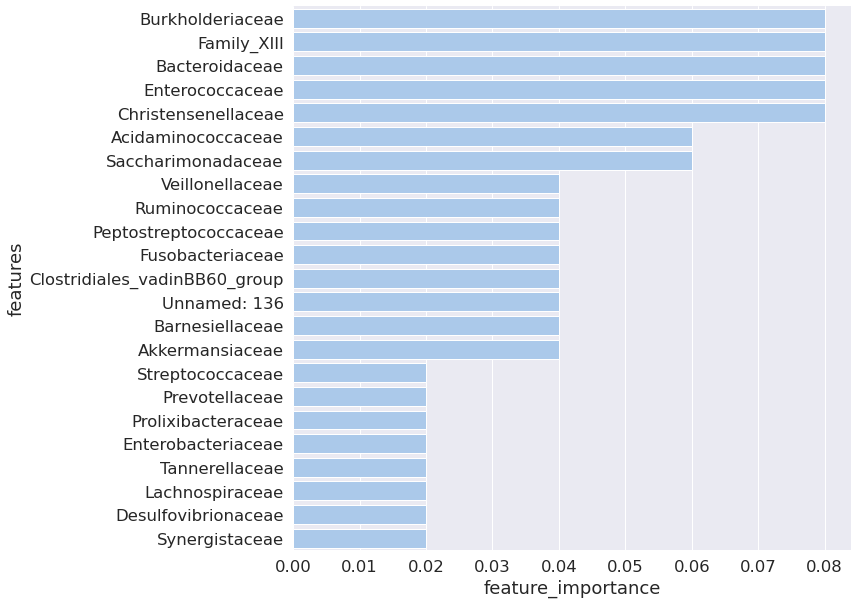

In [312]:
sns.set_context('paper')

sns.set(font_scale = 1.5)

sns.set_color_codes('pastel')
sns.barplot(x = 'feature_importance' , y = 'features' , data = or_imp_lb[:23],
            label = 'Total', color = 'b', edgecolor = 'w')

sns.despine(left = True, bottom = True)
sns.set(rc={'figure.figsize':(10,10)})

plt.show()

### Random forest

In [15]:
rf_est = RandomForestClassifier(random_state = 0)
parametrs = {'criterion': ['entropy'],
             'n_estimators': range(10,100,25),
             'max_depth': range(1,20,4),
             'min_samples_leaf':range(1,21,4)}

grid = GridSearchCV(rf_est, parametrs, cv=3,n_jobs=-1)

In [16]:
grid.fit(X_train, y_train)
grid.best_params_ 

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 5,
 'n_estimators': 85}

In [17]:
grid_best_or = grid.best_estimator_
predictions_full_or = grid_best_or.predict(X_test)
print(classification_report(y_test, predictions_full_or))

              precision    recall  f1-score   support

          NR       0.65      1.00      0.79        11
           R       1.00      0.33      0.50         9

    accuracy                           0.70        20
   macro avg       0.82      0.67      0.64        20
weighted avg       0.81      0.70      0.66        20



In [18]:
feature_importanc_or = grid_best_or.feature_importances_

In [20]:
feature_importances=pd.DataFrame({'features':X.columns,'feature_importance':grid_best_or.feature_importances_})
rf_plt = feature_importances.sort_values('feature_importance',ascending=False)

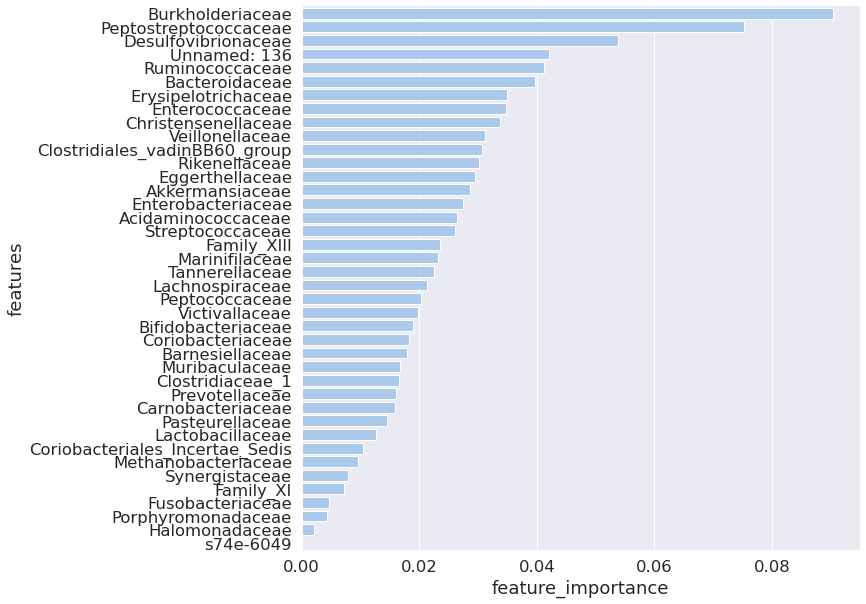

In [25]:
sns.set_context('paper')

sns.set(font_scale = 1.5)

sns.set_color_codes('pastel')
sns.barplot(x = 'feature_importance' , y = 'features' , data = rf_plt[:40],
            label = 'Total', color = 'b', edgecolor = 'w')

sns.despine(left = True, bottom = True)
sns.set(rc={'figure.figsize':(10,10)})

plt.show()